# MIS Divergence

In [1]:
import numpy as np
import os
from skimage.metrics import mean_squared_error, structural_similarity
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
#scenes_list = ['mis', 'mis_specific', 'bathroom2', 'cornell-box']
#image_references = ["references/mis.png", "references/mis_specific.png", "references/bathroom2.png", "references/cornell-box.png"]
scenes_list = ['mis_specific']
image_references = ["references/mis_specific.png"]

ref_images = {}
for i, img in enumerate(image_references):
    ref_images[scenes_list[i]] = np.array(Image.open(img))

In [3]:
figures_output = f"figures"

if not os.path.exists(figures_output):
    os.makedirs(figures_output)

In [4]:
def get_alpha_map(filename):
    
    map_data = []
    with open(filename, 'r') as f:
        for line in f.readlines():
            map_data.append([ float(n) for n in line.replace(';\n', '').split(';') ])
        
    return np.array(map_data)

In [5]:
def display_and_save(filename, label, ref_image, np_image, alpha_map):
    fig, (ax1, ax2) = plt.subplots(figsize=(10, 4), ncols=2, gridspec_kw={'width_ratios': [1.33, 1.67]})
    #plt.suptitle(label)
    rmse = np.sqrt(mean_squared_error(np_image, ref_image))
    ssim = structural_similarity(np_image, ref_image, channel_axis=2)
    ax1.imshow(np_image, clim=(0, 255))
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    ax1.set_title(f'RMSE: {rmse:.3f} / SSIM: {ssim:.3f}', fontsize=18)

    pos_neg_clipped = ax2.imshow(alpha_map, cmap='RdBu', clim=(0, 1))
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    ax2.set_title('alpha-map', fontsize=18)

    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    plt.subplots_adjust(wspace=0.02, hspace=0)
    cbar = fig.colorbar(pos_neg_clipped, ax=ax2, location='right', anchor=(0, 0.5), shrink=0.95)
    plt.tight_layout()
    fig.savefig(filename)
    print(f'-- Saved into {filename}')

In [6]:
def generate_figure(folder_base, folder_prefix, folder_list, label_list, ref_image, img_prefix, nspp):
    
    figures_list = []
    for i, elem in enumerate(folder_list):
        folder = os.path.join(folder_base, folder_prefix + elem)

        image_name = os.path.join(folder, img_prefix, f'{img_prefix}-S{nspp}.png')
        map_file_name = os.path.join(folder, img_prefix, f'{img_prefix}-S{nspp}.map')

        alpha_map = get_alpha_map(map_file_name)
        print(image_name)
        np_image = np.array(Image.open(image_name))
        _, scene_folder = os.path.split(folder)
        
        if not os.path.exists(figures_output):
            os.makedirs(figures_output)
            
        output_path_figure = os.path.join(figures_output, scene_folder + f'_{img_prefix}.pdf')
        display_and_save(output_path_figure, label_list[i], ref_image, np_image, alpha_map)
        figures_list.append(output_path_figure)
        
    return figures_list

../results/simplepath_pdfs/MIS-Equal/mis_specific/mis_specific-S100.png
-- Saved into figures/MIS-Equal_mis_specific.pdf
../results/simplepath_pdfs/MIS-BRDF/mis_specific/mis_specific-S100.png
-- Saved into figures/MIS-BRDF_mis_specific.pdf
../results/simplepath_pdfs/MIS-Light/mis_specific/mis_specific-S100.png
-- Saved into figures/MIS-Light_mis_specific.pdf
../results/simplepath_pdfs/MIS-T0-01/mis_specific/mis_specific-S100.png
-- Saved into figures/MIS-T0-01_mis_specific.pdf
../results/simplepath_pdfs/MIS-T0-5/mis_specific/mis_specific-S100.png
-- Saved into figures/MIS-T0-5_mis_specific.pdf
../results/simplepath_pdfs/MIS-T1/mis_specific/mis_specific-S100.png
-- Saved into figures/MIS-T1_mis_specific.pdf
../results/simplepath_pdfs/MIS-T1-5/mis_specific/mis_specific-S100.png
-- Saved into figures/MIS-T1-5_mis_specific.pdf
../results/simplepath_pdfs/MIS-T2/mis_specific/mis_specific-S100.png
-- Saved into figures/MIS-T2_mis_specific.pdf


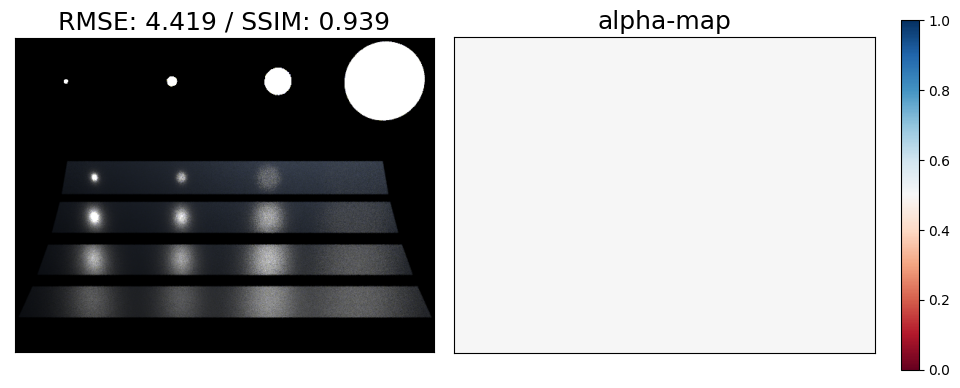

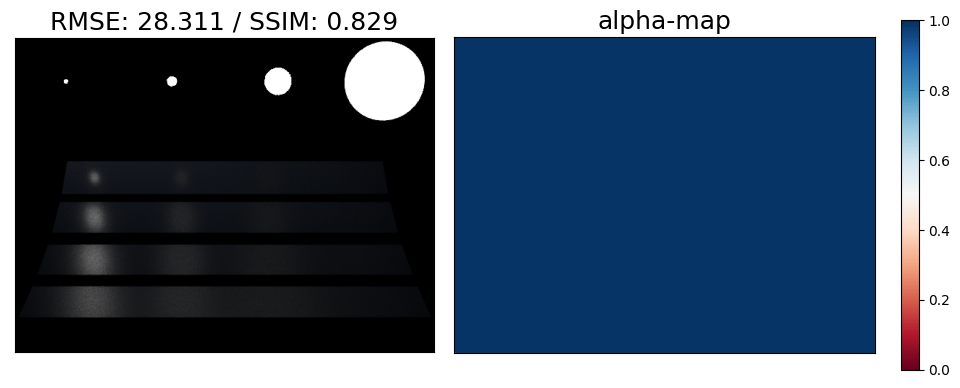

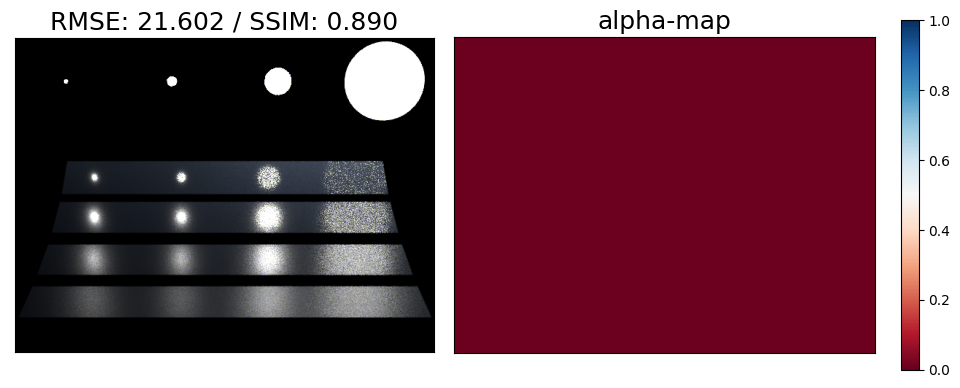

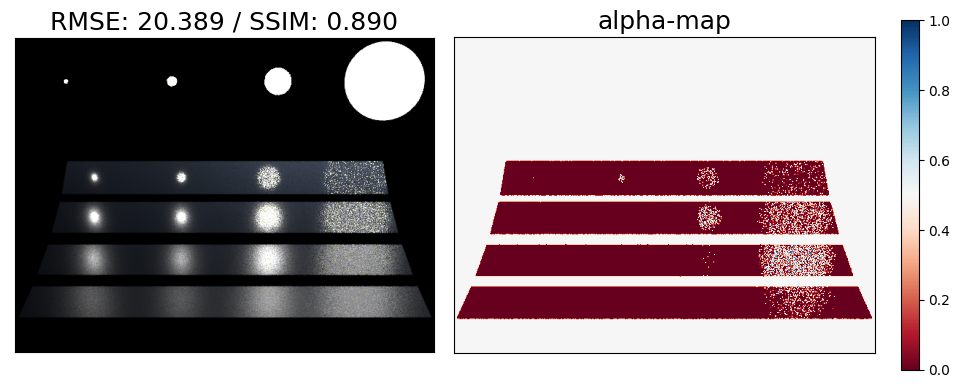

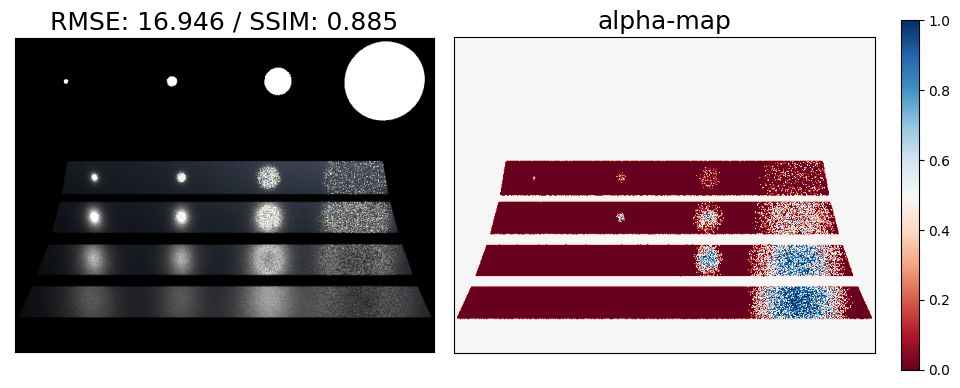

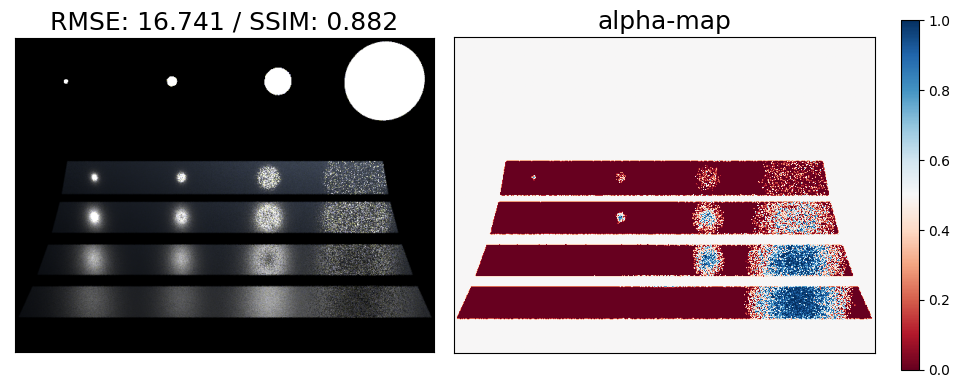

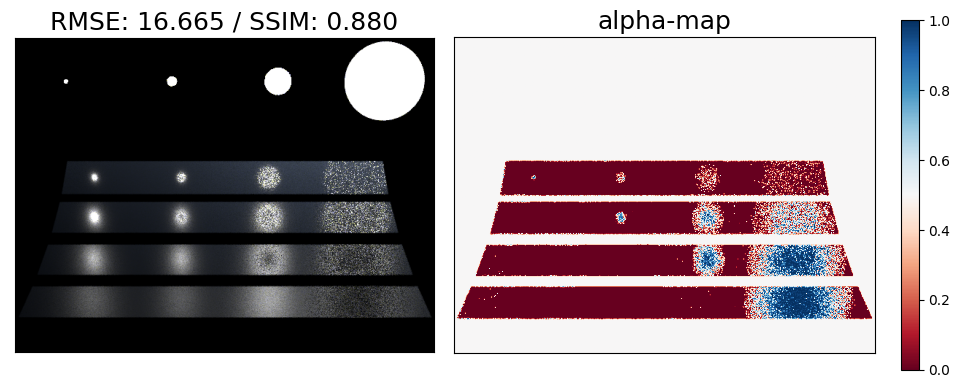

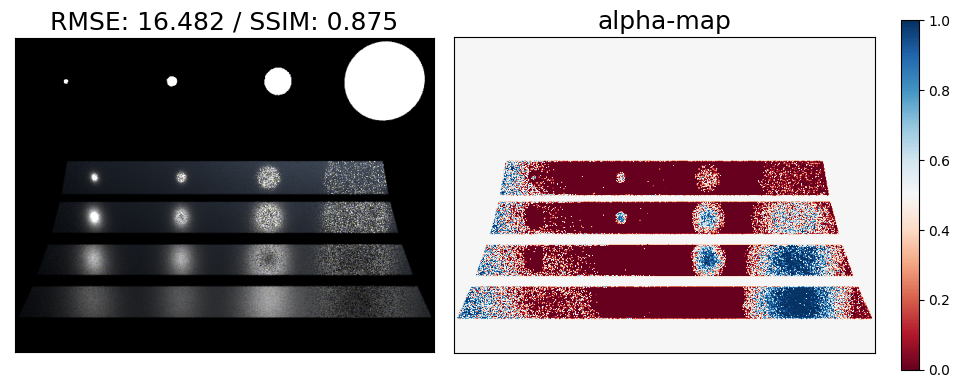

In [7]:
NSPP = 100
base_folder = f"../results/simplepath_pdfs"
folder_prefix = "MIS-"
folder_list = ["Equal", "BRDF", "Light", "T0-01", "T0-5", "T1", "T1-5", "T2"]
#folder_list = ["Equal", "BRDF", "Light", "T0-01", "T0-5", "T1", "T1-5", "T2"]
#label_list = ["Equal", "BRDF", "Light", "T0-01", "T0-5", "T1", "T1-5", "T2", "Linear"]
legends = ["Equal", "BRDF", "Light", "Tsallis ($0.01$)", "Tsallis ($0.5$)", "Tsallis ($1$)", "Tsallis ($1.5$)", "Tsallis ($2$)"]

scenes_figures = {}
for scene in scenes_list:
    figures_list = generate_figure(base_folder, folder_prefix, folder_list, legends, ref_images[scene], scene, NSPP)
    scenes_figures[scene] = figures_list

In [10]:
def export_in_latex(figures, legends, scene):
    
    latex_content = '\\begin{figure}[ht]\n'
    
    for i, fig in enumerate(figures):
        
        latex_content += '\t\\begin{subfigure}[b]{0.48\\textwidth}\n'
        latex_content += '\t\\centering\n'
        latex_content += f'\t\t\\includegraphics[width=\\textwidth]{{{fig}}}\n'
        latex_content += f'\t\t\\caption{{{legends[i]}}}\n'
        latex_content += '\t\\end{subfigure}\n'
        
    latex_content += f'\t\\caption{{MIS comparisons on {scene} scene}}\n'
    latex_content += '\\end{figure}'
    
    return latex_content

In [11]:
for scene in scenes_list:
    latex_content = export_in_latex(scenes_figures[scene], legends, scene)
    print(latex_content)

\begin{figure}[ht]
	\begin{subfigure}[b]{0.48\textwidth}
	\centering
		\includegraphics[width=\textwidth]{figures/MIS-Equal_mis_specific.pdf}
		\caption{Equal}
	\end{subfigure}
	\begin{subfigure}[b]{0.48\textwidth}
	\centering
		\includegraphics[width=\textwidth]{figures/MIS-BRDF_mis_specific.pdf}
		\caption{BRDF}
	\end{subfigure}
	\begin{subfigure}[b]{0.48\textwidth}
	\centering
		\includegraphics[width=\textwidth]{figures/MIS-Light_mis_specific.pdf}
		\caption{Light}
	\end{subfigure}
	\begin{subfigure}[b]{0.48\textwidth}
	\centering
		\includegraphics[width=\textwidth]{figures/MIS-T0-01_mis_specific.pdf}
		\caption{Tsallis ($0.01$)}
	\end{subfigure}
	\begin{subfigure}[b]{0.48\textwidth}
	\centering
		\includegraphics[width=\textwidth]{figures/MIS-T0-5_mis_specific.pdf}
		\caption{Tsallis ($0.5$)}
	\end{subfigure}
	\begin{subfigure}[b]{0.48\textwidth}
	\centering
		\includegraphics[width=\textwidth]{figures/MIS-T1_mis_specific.pdf}
		\caption{Tsallis ($1$)}
	\end{subfigure}
	\begin{su